# LAB 7 : Write a program to implement the Random Forest Algorithm  

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# import Dataset
df = pd.read_csv('/Sonar.csv')

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Dimension of Dataset
df.shape

(208, 61)

In [6]:
# Atrribute of Dataset
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [7]:
# info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [8]:
# Description of Dataset
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
# Putting feature variable to X
X = df.drop('Label', axis=1)
# Putting response variable to y
y = df['Label']

In [10]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 35)
X_train.shape, X_test.shape

((145, 60), (63, 60))

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [17]:
# checking the oob score
classifier_rf.oob_score_

0.8275862068965517

In [18]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [19]:
grid_search.best_score_

0.8481606606606608

In [20]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

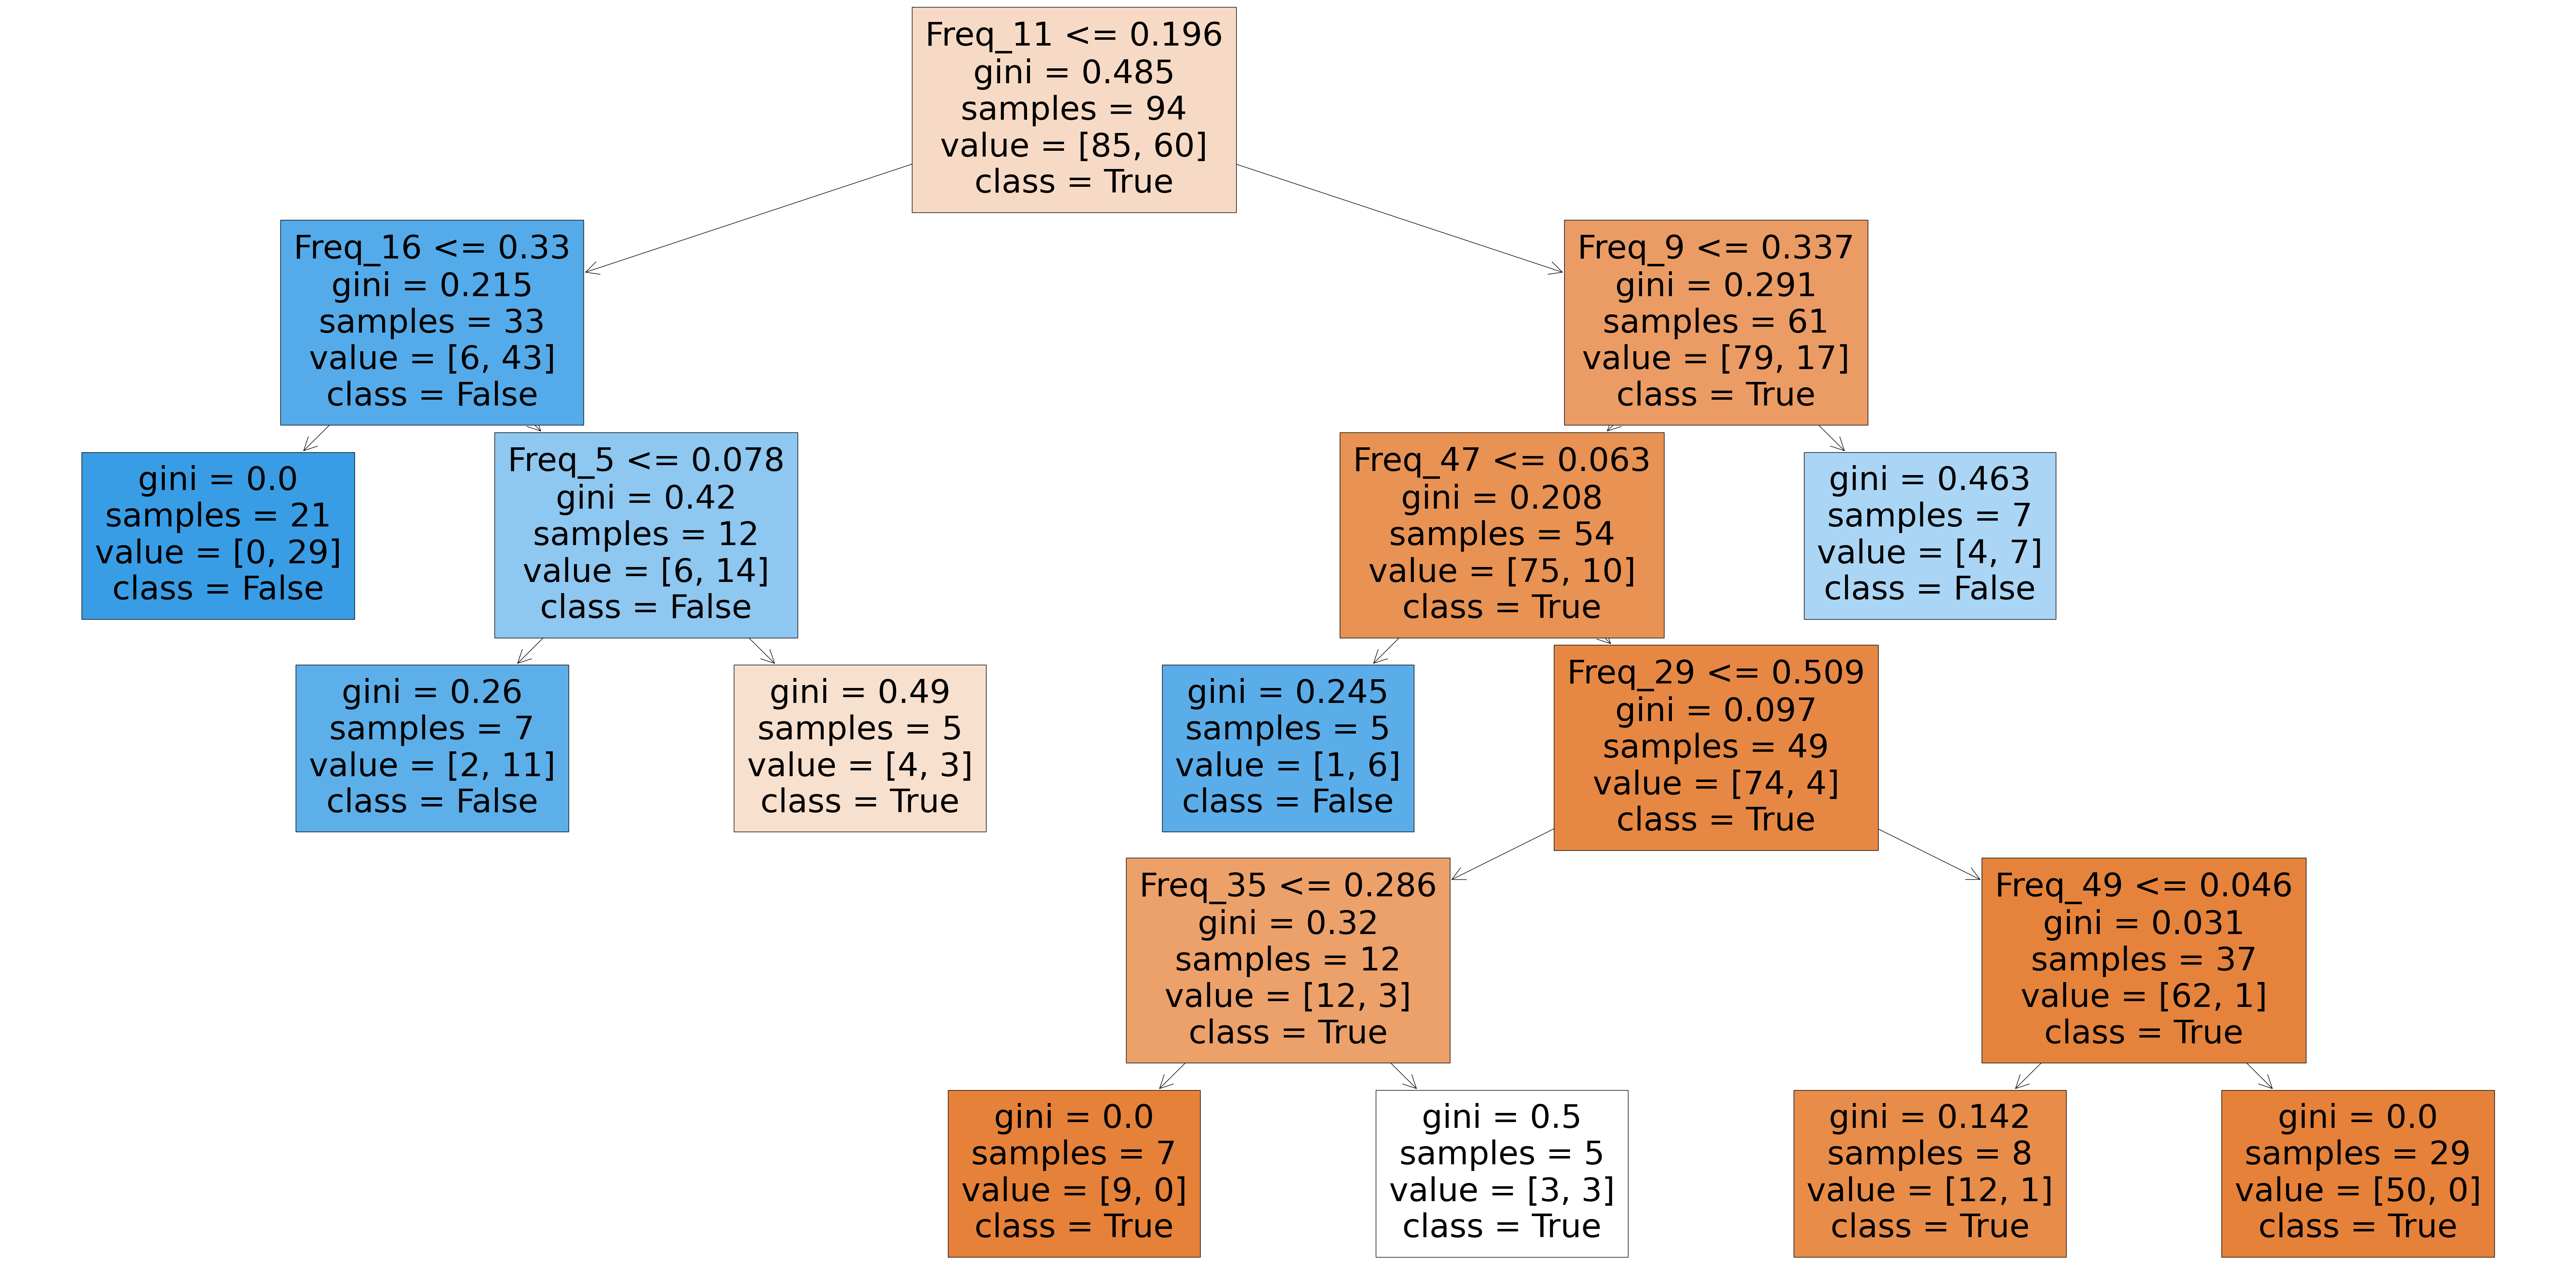

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[3], feature_names = X.columns,class_names=['True', "False"], filled=True);


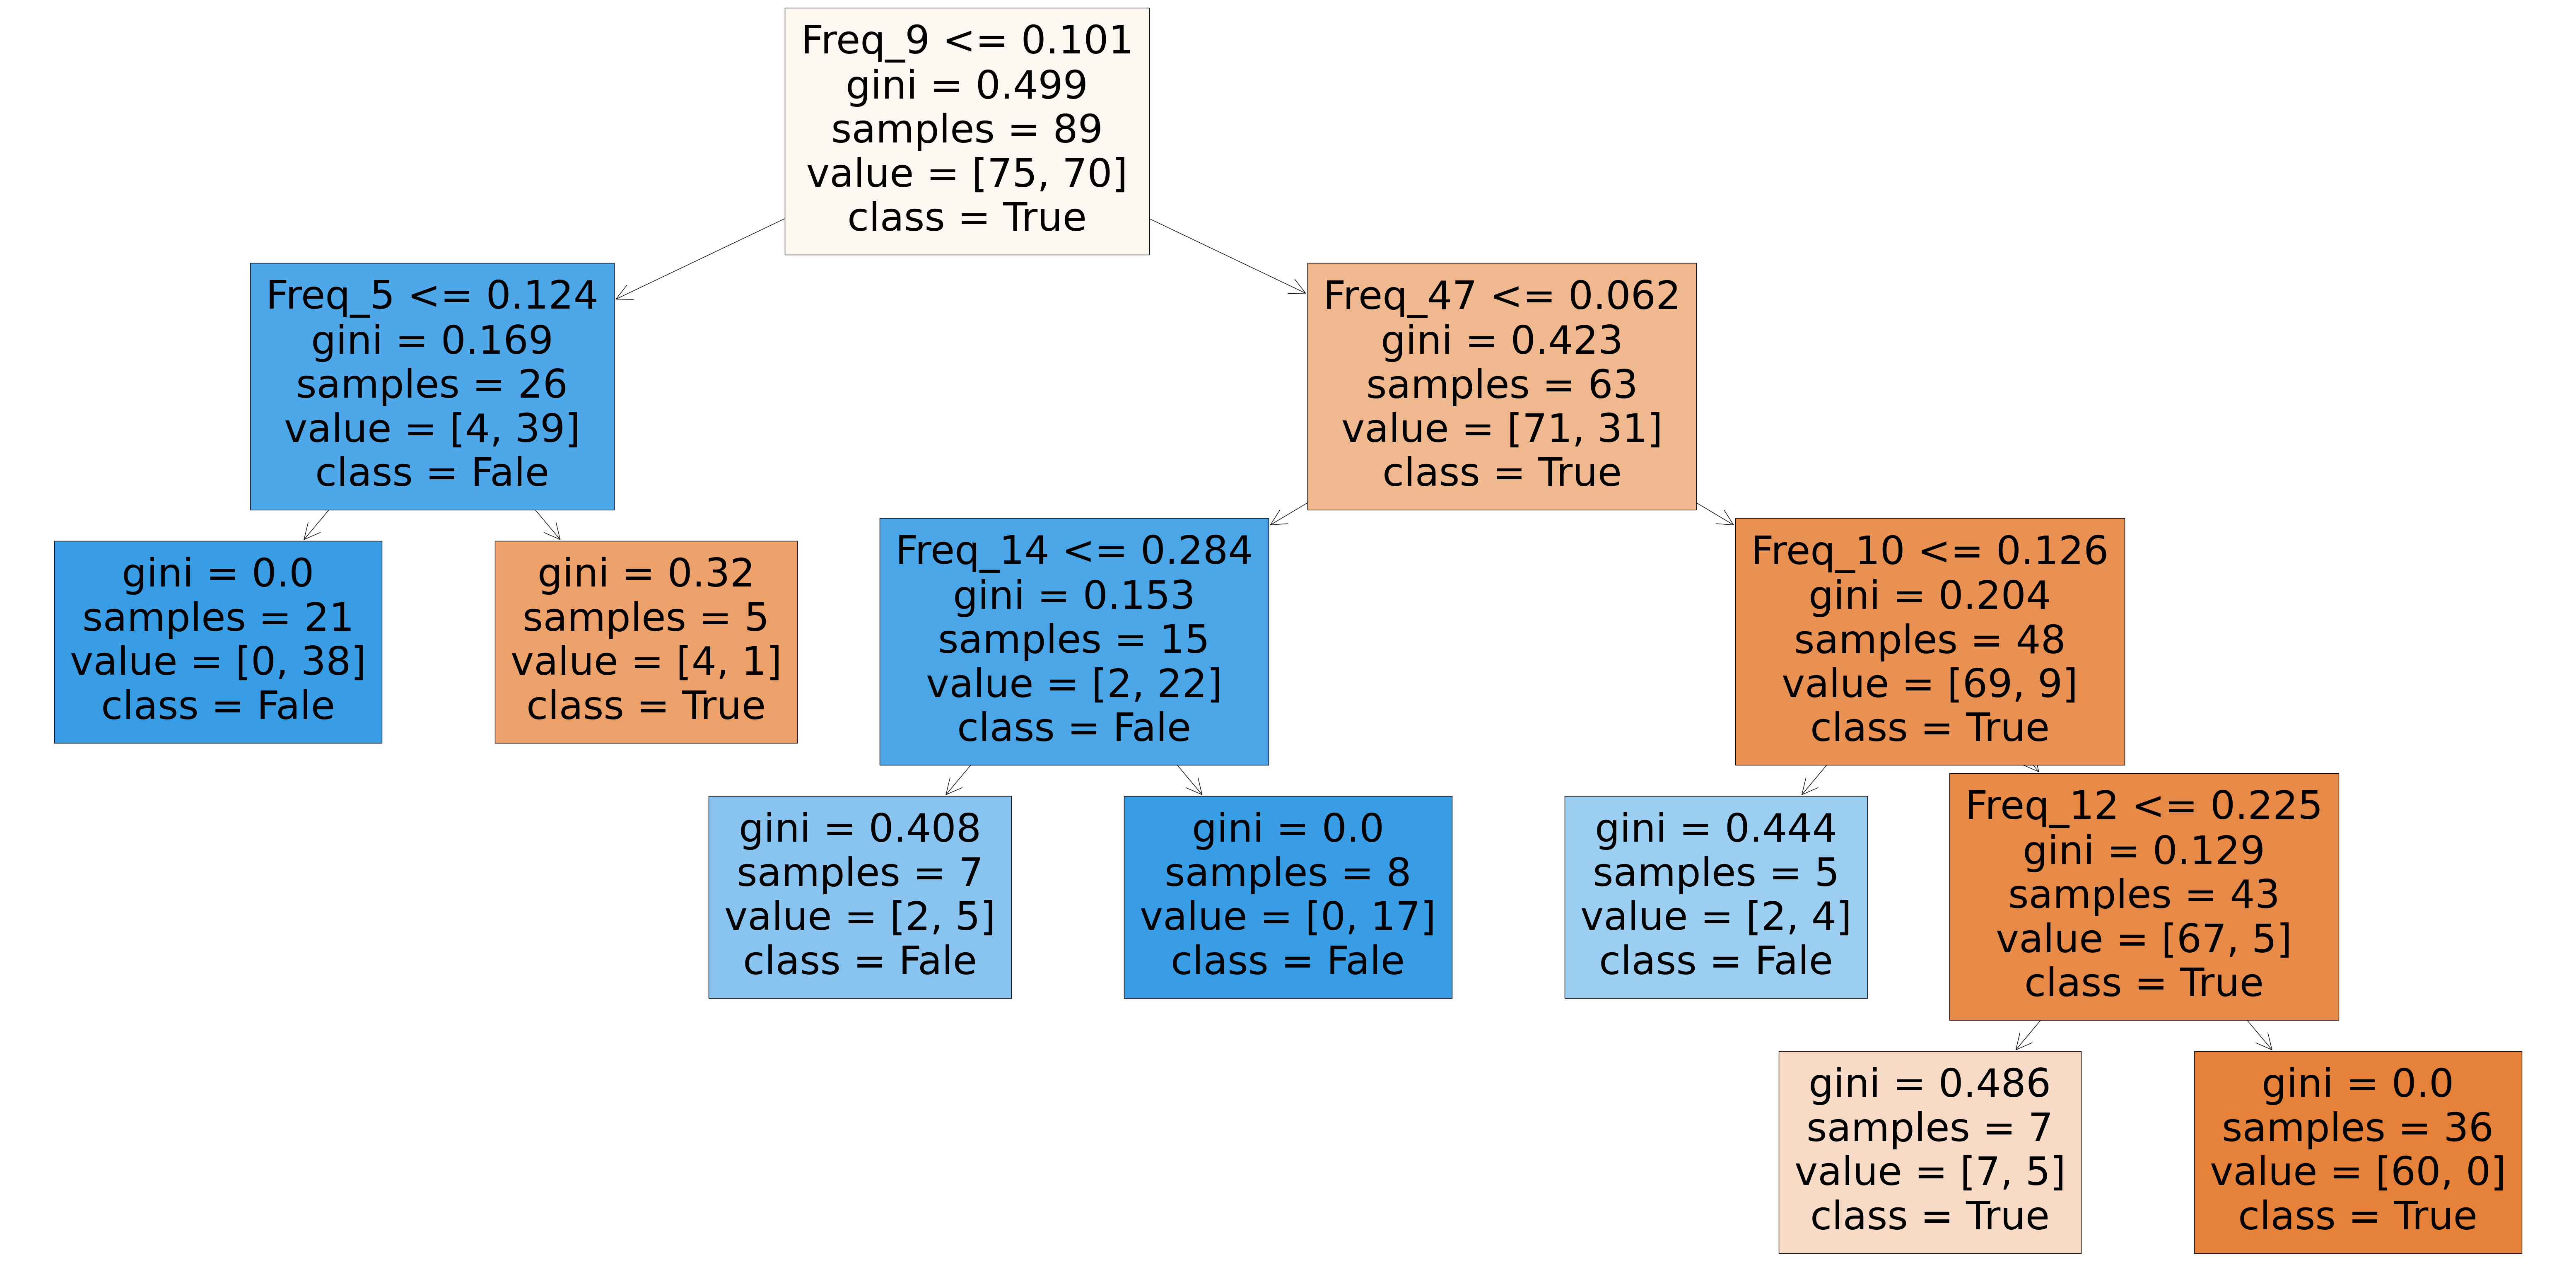

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[6], feature_names = X.columns,class_names=['True', "Fale"], filled=True);

In [23]:
rf_best.feature_importances_

array([0.00735223, 0.0078184 , 0.01503696, 0.00703263, 0.03230064,
       0.01632976, 0.00353963, 0.00584819, 0.0305268 , 0.04228037,
       0.11542278, 0.05681045, 0.048792  , 0.00251758, 0.00783037,
       0.00914562, 0.00431804, 0.00627856, 0.00051576, 0.0111207 ,
       0.02706913, 0.00779995, 0.01497058, 0.00723802, 0.00464025,
       0.00536467, 0.00665163, 0.00827835, 0.00402612, 0.00050159,
       0.01820911, 0.00688204, 0.00293437, 0.00751794, 0.01543153,
       0.03645139, 0.00975175, 0.00427682, 0.00320862, 0.01021863,
       0.00181921, 0.00870909, 0.01362977, 0.01802586, 0.03658794,
       0.04599598, 0.02766408, 0.06685388, 0.03480799, 0.00506586,
       0.02920453, 0.0360458 , 0.00492576, 0.00585129, 0.0032918 ,
       0.0067392 , 0.00270377, 0.00397356, 0.00831897, 0.0075457 ])

In [24]:
## feature importance

imp_df = pd.DataFrame({
    "Frequncy": X_train.columns,
    "Rate": rf_best.feature_importances_
})

In [28]:
imp_df.sort_values(by="Rate", ascending = True)

,Frequncy,Rate
29,Freq_30,0.000502
18,Freq_19,0.000516
40,Freq_41,0.001819
13,Freq_14,0.002518
56,Freq_57,0.002704
32,Freq_33,0.002934
38,Freq_39,0.003209
54,Freq_55,0.003292
6,Freq_7,0.003540
57,Freq_58,0.003974
